## Lets take a look at our full videos and pull some metadata from them in case we need this information later on
### Since the videos are from iphone and ffmpeg will decode/encode them to mp4 format, lets make sure we pull down critical information before any processing

In [200]:
#| include: false
from fastai.vision.all import *
from IPython.display import Video
import ffmpeg
import cv2

In [62]:
#| echo: false
data_path = '../../../data'
video_paths = get_files(f'{data_path}/full_videos/', extensions='.MOV')
video_names = [fpath.name.split('.')[0] for fpath in video_files] 
print(f'we have {len(video_files)} total videos & the file names are: \n{video_names}')

we have 28 total videos & the file names are: 
['IMG_1014', 'IMG_1017', 'IMG_1015', 'IMG_1018', 'IMG_1023', 'IMG_1016', 'IMG_1019', 'IMG_0851', 'IMG_0855', 'IMG_0856', 'IMG_0849', 'IMG_0860', 'IMG_0857', 'IMG_0852', 'IMG_0853', 'IMG_0858', 'IMG_0859', 'IMG_0854', 'IMG_0848', 'IMG_0861', 'IMG_1090', 'IMG_1087', 'IMG_1088', 'IMG_1092', 'IMG_1086', 'IMG_1093', 'IMG_1091', 'IMG_1089']


### The videos we have are pretty big compared to the clipped version of the individual swings

In [55]:
#| echo: false
! du -sh ../../../data/full_videos/jun8/IMG_0856.MOV
! du -sh ../../../data/clips/accurate/IMG_0856_swing_3_score_2.mp4

177M	../../../data/full_videos/jun8/IMG_0856.MOV
4.0M	../../../data/clips/accurate/IMG_0856_swing_3_score_2.mp4


### Lets aggregate our metadata extraction into a class to make it easier to read every file and have something easier to understand and change if we get more data or figure out bugs

In [167]:
class video_metadata():
    def __init__(self, file_path):
        self.file_path = file_path
        self.metadata = self.get_metadata(self.file_path)
        self.height = self.metadata['height']
        self.width = self.metadata['width']
        self.fps = self.get_fps(self.metadata)
        self.minutes = self.get_duration(self.metadata, minutes=True)
        self.seconds = self.get_duration(self.metadata)
        self.bitrate = self.get_bitrate(self.metadata)

    def aggregate_metadata(self):
        return {'file_name': str(self.file_path).split('/')[-1],
                'fps': self.fps,
                'height': self.height,
                'width': self.width,
                'minutes': self.minutes,
                'seconds': self.seconds,
                'bitrate': self.bitrate,
                'file_path': self.file_path,
                }
    def get_metadata(self, file_path):
        '''
        Sometimes the video metadata is not in the first stream??
        '''
        meta_list = ffmpeg.probe(file_path)['streams']
        for meta in meta_list:
            try: 
                meta['height']
                return meta
            except:
                pass
                 
    def get_fps(self, metadata):
        fps = metadata['r_frame_rate']
        return round(eval(fps))

    def get_duration(self, metadata, minutes=False):
        seconds = round(float(metadata['duration']))
        # returns time in minutes
        if minutes: 
            return seconds / 60
        else: return seconds

    def get_bitrate(self, metadata):
        ### returns bit rate in megabyte -- divide by 1000 for Kbs and once more for Mbs
        bitrate = int(metadata['bit_rate']) / 1000 / 1000
        return bitrate

In [171]:
video_metadata(video_paths[12]).aggregate_metadata()

{'file_name': 'IMG_0857.MOV',
 'fps': 30,
 'height': 1080,
 'width': 1920,
 'minutes': 2.55,
 'seconds': 153,
 'bitrate': 8.605271,
 'file_path': Path('../../../data/full_videos/jun8/IMG_0857.MOV')}

In [172]:
#| include: false
metadata_list = [video_metadata(video_path).aggregate_metadata() for video_path in video_paths]

In [201]:
#| echo: false
full_video_df = pd.DataFrame(metadata_list).sort_values(by='file_name').reset_index(drop=True)
full_video_df.to_csv('full_video_metadata.csv', index=False)
df = pd.read_csv('full_video_metadata.csv')
df

,file_name,fps,height,width,minutes,seconds,bitrate,file_path
0,IMG_0848.MOV,30,1080,1920,4.383333,263,8.610146,../../../data/full_videos/jun8/IMG_0848.MOV
1,IMG_0849.MOV,30,1080,1920,9.200000,552,8.583966,../../../data/full_videos/jun8/IMG_0849.MOV
2,IMG_0851.MOV,30,960,540,2.866667,172,4.692317,../../../data/full_videos/jun8/IMG_0851.MOV
3,IMG_0852.MOV,30,540,960,2.950000,177,1.370111,../../../data/full_videos/jun8/IMG_0852.MOV
4,IMG_0853.MOV,30,540,960,2.716667,163,1.367803,../../../data/full_videos/jun8/IMG_0853.MOV
5,IMG_0854.MOV,30,1080,1920,2.616667,157,8.607743,../../../data/full_videos/jun8/IMG_0854.MOV
6,IMG_0855.MOV,30,1080,1920,2.966667,178,8.598368,../../../data/full_videos/jun8/IMG_0855.MOV
7,IMG_0856.MOV,30,1080,1920,2.783333,167,8.588547,../../../data/full_videos/jun8/IMG_0856.MOV
8,IMG_0857.MOV,30,1080,1920,2.550000,153,8.605271,../../../data/full_videos/jun8/IMG_0857.MOV
9,IMG_0858.MOV,30,568,320,3.050000,183,1.865664,../../../data/full_videos/jun8/IMG_0858.MOV


Now we have a quick and easily understandable way to extract all the metadata relative to our videos and get a better understaning of where outliers may lie with respect to data quality or frame rate and also to better understand the overall distribution we have amongst our data 

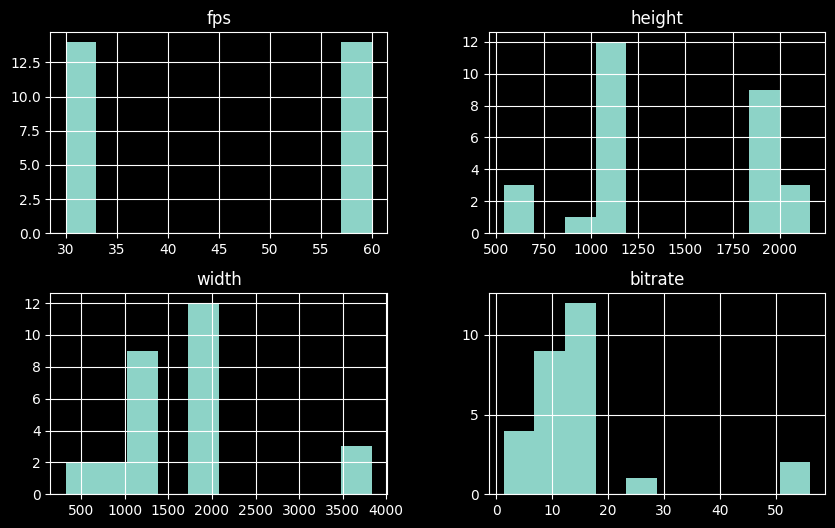

In [205]:
#| echo: false
plt.style.use('dark_background')
df.hist(column=['fps', 'height', 'width', 'bitrate'],
       figsize=(10, 6))
plt.yticks(np.arange(0, 15, 5));